# Week 5

## Kinnick Fox
## DSC530

All code before Exercise 5-1 is written by Allen B. Downey

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [8]:
import numpy as np

import thinkstats2
import thinkplot

In [50]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [10]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

In [11]:
import hinc
income_df = hinc.ReadData()

In [33]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [41]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [43]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [34]:
def Mean(xs):
    return RawMoment(xs, 1)

In [35]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [36]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

In [45]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [13]:
log_sample = InterpolateSample(income_df, log_upper=6.0)

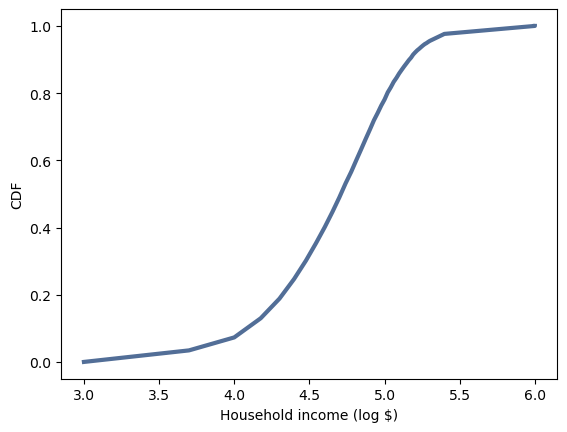

In [14]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [15]:
sample = np.power(10, log_sample)

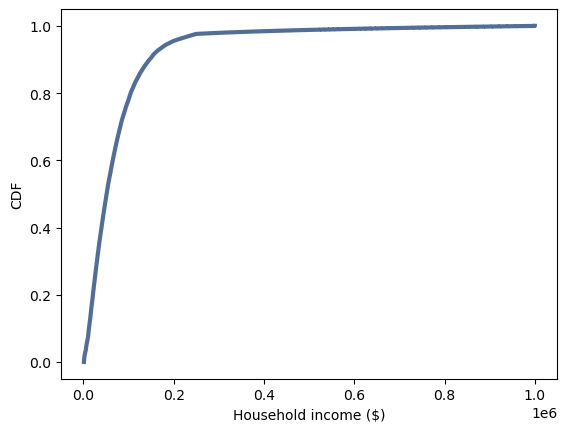

In [16]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

## Exercises

**Exercise 5-1:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [17]:
import scipy.stats

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [18]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_continuous_frozen

A "frozen random variable" can compute its mean and standard deviation.

In [19]:
dist.mean(), dist.std()

(178.0, 7.7)

It can also evaluate its CDF.  How many people are below the mean by more than one standard deviation?  About 16%

In [20]:
dist.cdf(mu - sigma)

0.1586552539314574

How many people are between 5'10" and 6'1"?

In [22]:
# inches to cm conversion required before finding percentages
six_one = dist.cdf(73 * 2.54)
five_ten = dist.cdf(70 * 2.54)
percentage = (six_one-five_ten) * 100

In [24]:
print("{}% of males are between 5'10'' and 6'1''.".format(str(percentage)[:4]))

34.2% of males are between 5'10'' and 6'1''.


**Exercise 5-2:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [25]:
alpha = 1.7
xmin = 1  # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

What is the mean height in Pareto world?

In [27]:
p_mean = dist.mean()
p_mean

2.428571428571429

What fraction of people are shorter than the mean?

In [28]:
dist.cdf(p_mean)

0.778739697565288

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [66]:
population = 7000000000
# find the percentage of people taller than 1 km (1000 m) and multiply it by the population
(1 - dist.cdf(1000)) * population

55602.976430479954

How tall do we expect the tallest person to be?

In [70]:
# find the solatary largest probable hight measure of the population 
dist.ppf(1 - 1/population)

618349.6106759505

**Exercise 6-1:** The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under \$5000.” The highest range includes respondents who made “\$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. `hinc2.py` provides `InterpolateSample`, which shows one way to model this data. It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars. The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`InterpolateSample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a `log10` scale.

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?

In [38]:
sample_mean = Mean(sample)
sample_mean

74278.70753118733

In [39]:
sample_median = Median(sample)
sample_median

51226.45447894046

In [44]:
sample_skewness = Skewness(sample)
sample_skewness

4.949920244429583

In [46]:
sample_p_skewness = PearsonMedianSkewness(sample)
sample_p_skewness

0.7361258019141782

In [62]:
mean_percentage = cdf.Prob(sample_mean) * 100

In [65]:
print("{}% of the population makes less than the mean.".format(str(mean_percentage)[:2]))

66% of the population makes less than the mean.


All of this is based on an assumption that the highest income is one million dollars, but that's certainly not correct. What happens to the skew if the upper bound is 10 million?

Without better information about the top of this distribution, we can't say much about the skewness of the distribution.

**The scew becomes ever more extreme and the majority of individuals still make <200,000 causing a small portion of the population to have the highest incomes.**

In [51]:
# update original InterpolateSample function with an upper log of 7 (10 million)
def NewInterpolateSample(df, log_upper=7.0):
    df['log_upper'] = np.log10(df.income)
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0
    df.loc[41, 'log_upper'] = log_upper
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)
    log_sample = np.concatenate(arrays)
    return log_sample

In [52]:
# create new log sample with log upper of 7 (10 million)
new_log_sample = NewInterpolateSample(income_df, log_upper=7.0)

In [54]:
# create new sample using new log sample
new_sample = np.power(10, new_log_sample)

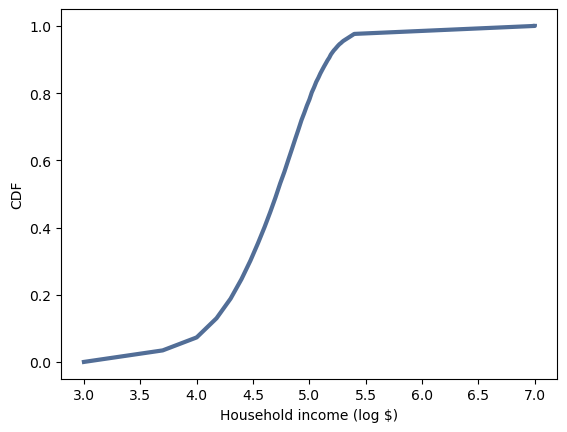

In [71]:
# recreate log cdf plot with new sample
log_cdf = thinkstats2.Cdf(new_log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

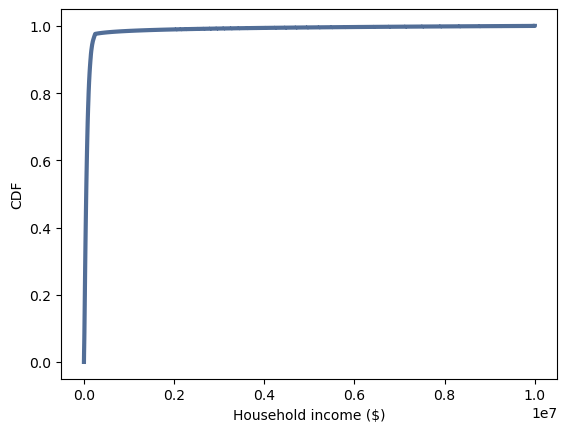

In [59]:
# recreate cdf plot with new sample
cdf = thinkstats2.Cdf(new_sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

In [55]:
new_sample_skewness = Skewness(new_sample)
new_sample_skewness

11.603690267537793

In [56]:
new_sample_p_skewness = PearsonMedianSkewness(new_sample)
new_sample_p_skewness

0.39156450927742087